In [76]:
!pip install pmdarima

  Using cached pmdarima-1.8.3-cp39-cp39-macosx_10_15_x86_64.whl (603 kB)
     |████████████████████████████████| 1.9 MB 162 kB/s 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima

In [3]:
finalset = pd.read_csv('finalset.csv')

In [4]:
testset = finalset[finalset['store_id']==4]['amount']
testset

132    7.334286e+05
133    7.689286e+05
134    6.984286e+05
135    9.364286e+05
136    7.627143e+05
137    8.595714e+05
138    1.069857e+06
139    6.891429e+05
140    1.050143e+06
141    9.702857e+05
142    1.085171e+06
143    1.035857e+06
144    8.941429e+05
145    1.022714e+06
146    1.191429e+06
147    9.725714e+05
148    1.060571e+06
149    1.189143e+06
150    1.010143e+06
151    8.315714e+05
152    6.510000e+05
153    9.080000e+05
154    7.922143e+05
155    7.754286e+05
156    8.812857e+05
157    1.050929e+06
158    8.492857e+05
159    6.981429e+05
160    8.284286e+05
161    8.830000e+05
162    9.238571e+05
163    9.448571e+05
164    8.822857e+05
Name: amount, dtype: float64

In [5]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', lags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [6]:
adf_test(testset)

Results of Dickey-Fuller Test:
Test Statistic                 -4.125034
p-value                         0.000880
#Lags Used                      0.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


In [7]:
kpss_test(testset)

Results of KPSS Test:
Test Statistic           0.174151
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-5-e9840422ca7d>:11: FutureWarning: the 'lags'' keyword is deprecated, use 'nlags' instead
  kpsstest = kpss(timeseries, regression='c', lags="auto")
/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


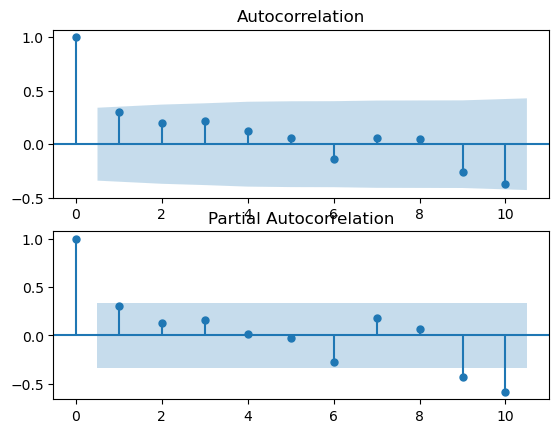

In [8]:
N_LAGS = 10
SIGNIFICANCE_LEVEL = 0.05

fig, ax = plt.subplots(2, 1)
plot_acf(testset, ax=ax[0], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
plot_pacf(testset, ax=ax[1], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
plt.show()
plt.tight_layout()

In [9]:
# 이번에는 for를 사용하여 최적의 p,q를 찾아보고자 한다.

for i in range(0,2):
  for j in range(0,2):
    model = ARIMA(testset, order=(i,1,j))
    model_fit1 = model.fit(trend='c',full_output=True, disp=True, start_ar_lags=i+j)
    print(model_fit1.summary().tables[1])
    

# ARIMA에서는 자동적으로 차분을 진행하기 때문에 모델 구축시 변수는 원 데이터를 삽입한다.

/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An uns

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4651.7857   2.94e+04      0.158      0.874    -5.3e+04    6.23e+04
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4160.5975   9361.856      0.444      0.657   -1.42e+04    2.25e+04
ma.L1.D.amount    -0.6426      0.138     -4.643      0.000      -0.914      -0.371
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4651.7857   1.88e+04      0.248      0.804   -3.21e+04    4.15e+04
ar.L1.D.amount    -0.4238      0.156     -2.713      0.007      -0.730      -0.118
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------

/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An uns

In [10]:
model = ARIMA(testset, order=(0,1,1))
model_fit1 = model.fit(trend='nc',full_output=True, disp=True, start_ar_lags=4)
print(model_fit1.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.amount   No. Observations:                   32
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -424.635
Method:                       css-mle   S.D. of innovations         139062.487
Date:                Tue, 12 Oct 2021   AIC                            853.270
Time:                        16:43:15   BIC                            856.202
Sample:                             1   HQIC                           854.242
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ma.L1.D.amount    -0.6400      0.141     -4.540      0.000      -0.916      -0.364
                                    Roots                                    
                  Real          Imaginary

/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/jeong-giho/.conda/envs/pythonProject4/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An uns

In [11]:
forecast_data1 = model_fit1.forecast(steps=3)

In [13]:
forecast_data1

(array([893278.86237298, 893278.86237298, 893278.86237298]),
 array([139062.48671781, 147801.58713562, 156052.05255772]),
 array([[ 620721.39680549, 1165836.32794047],
        [ 603593.0747293 , 1182964.65001666],
        [ 587422.4596463 , 1199135.26509966]]))

In [14]:
forecast_data1[0].tolist()

[893278.862372981, 893278.862372981, 893278.862372981]

In [15]:
finalset.head(5)

,Unnamed: 0,store_id,amount,year_month,datetime
0,0,0,7.470000e+05,2016-06,2016-06-25
1,1,0,1.005000e+06,2016-07,2016-07-25
2,2,0,8.715714e+05,2016-08,2016-08-25
3,3,0,8.978571e+05,2016-09,2016-09-25
4,4,0,8.354286e+05,2016-10,2016-10-25


In [16]:
# 마지막 3개월의 예측 데이터
pred_arima_AC1 = forecast_data1[0].tolist()


# 마지막 3개월의 예측 데이터 최소값
pred_AC1_lower = []
# 마지막 3개월의 예측 데이터 최대값
pred_AC1_upper = []

for lower_upper in forecast_data1[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_AC1_lower.append(lower)
    pred_AC1_upper.append(upper)

In [17]:
pred_arima_AC1 = pd.DataFrame(np.array(pred_arima_AC1).astype(int))
pred_AC1_lower = np.array(pred_AC1_lower).astype(int)
pred_AC1_upper = np.array(pred_AC1_upper).astype(int)

<Figure size 640x480 with 0 Axes>

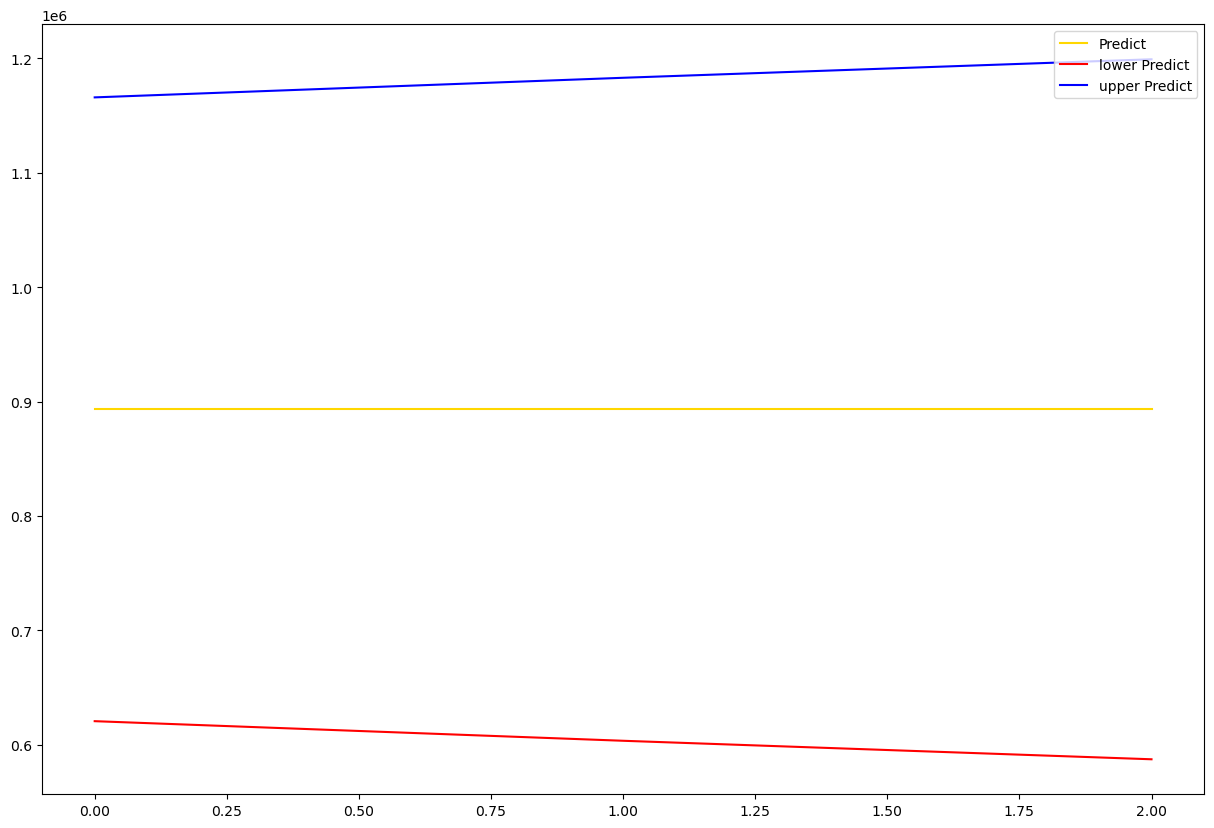

In [18]:
plt.figure(figsize=(15, 10))

# plt.plot(testset, color = 'k')

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_AC1, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_AC1_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_AC1_upper, color = 'blue')

plt.legend(['Predict', 'lower Predict','upper Predict'])
plt.show()

In [59]:
pred_arima_AC1

,0
0,92181
1,94482
2,94841
